# Exercício 01 - Implementação do Perceptron

Aluno: Frederico Luis de Azevedo

Professor: Dr. Francisco de Assis Boldt

## Bibliotecas e Inicialização

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

## Carregamento dos Dados

In [2]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data.data.shape

(569, 30)

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Divisão de Treino e Teste

In [5]:
X,y = data.data,data.target
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(569, 30) (569,)
(381, 30) (188, 30) (381,) (188,)


## Implementação do Perceptron como Classificador

In [13]:
class Perceptron(BaseEstimator):
    def __init__(self, n):
        self.n = n
        self.w = []
    
    def _0_1(self,x):
        if x >= 0.0:
            return 1
        else:
            return 0
        
    def fit(self, X, y):
        
        for i in range(len(X[0])):
            self.w.append(random.random())
        
        for i in range(len(X)):
            aux = 0
            
            for j in range(len(X[i])):
                print(self.w[j])
                aux += (X[i][j] * self.w[j])
            
            result_temp = self._0_1(aux)
            
            if (result_temp != y[i]):
                print('---------- recalculando ----------')
                error = y[i] - result_temp
                for z in range(len(self.w)):
                    self.w[z] = self.w[z] + (self.n * error * X[i][z])
    
    def predict(self, X):
        
        results = []
        
        for i in range(len(X)):
            aux = 0
            
            for j in range(len(X[i])):
                aux += (X[i][j] * self.w[j])
            
            results.append(self._0_1(aux))
                
        return results

In [7]:
n = 0.5
perceptron = Perceptron(n)

## Fase de treinamento do Perceptron

In [8]:
perceptron.fit(X_train,y_train)

0.9317205485359296
0.8940800722751361
0.8369723146835808
0.28835363471943465
0.24175757124134511
0.09289359496352723
0.5447589562510943
0.11632204493466769
0.0023580315955313846
0.5958341060941938
0.7116483921836927
0.714921907618396
0.550716415632656
0.8191639302082038
0.7358966493661817
0.2862354386087096
0.8438572395480144
0.9941712565469889
0.6037972277115119
0.6355584409177066
0.1583473516218208
0.8386847284270303
0.6564686480958002
0.30478702907365074
0.5043618202690394
0.6938232080931528
0.45948164855090423
0.425685254981815
0.6464817042402446
0.6241656751056652
---------- recalculando ----------
-8.06327945146407
-4.2959199277248645
-60.56302768531642
-500.21164636528056
0.1825575712413451
-0.04590640503647278
0.39470895625109426
0.042772044934667686
-0.11859196840446862
0.5564791060941938
0.1641483921836927
0.262271907618396
-3.7437835843673444
-75.8808360697918
0.7326971493661817
0.2617154386087096
0.8169922395480144
0.9862362565469889
0.5887822277115119
0.6324619409177067
-1

0.9555225712413452
0.24479859496352724
0.019802456251094235
-0.16740145506533238
1.306458031595531
1.1151341060941937
0.7725983921836928
9.572371907618393
0.2128164156326562
-157.19983606979181
0.792674149366182
0.34389743860870964
0.8929692395480145
1.0225842565469891
0.744762227711512
0.6542000409177068
66.45434735162182
177.753684728427
409.2064686480959
-545.3952129709268
1.4716668202690395
1.0688032080931529
0.000891648550904206
0.33967525498181494
2.606481704240245
1.244660675105665
70.03822054853595
134.98908007227516
422.9119723146837
567.7883536347194
0.9555225712413452
0.24479859496352724
0.019802456251094235
-0.16740145506533238
1.306458031595531
1.1151341060941937
0.7725983921836928
9.572371907618393
0.2128164156326562
-157.19983606979181
0.792674149366182
0.34389743860870964
0.8929692395480145
1.0225842565469891
0.744762227711512
0.6542000409177068
66.45434735162182
177.753684728427
409.2064686480959
-545.3952129709268
1.4716668202690395
1.0688032080931529
0.00089164855090

0.827593208093153
-0.5704758514490957
0.221455254981815
3.0764817042402446
1.395520675105665
89.40672054853596
175.56908007227514
536.6819723146837
748.7883536347194
1.1305925712413452
0.1866585949635272
-0.2588535437489058
-0.29063545506533245
1.646908031595531
1.259009106094194
1.0517483921836925
13.540871907618394
0.965316415632656
-186.06483606979185
0.8107826493661818
0.31387593860870966
0.8263447395480147
1.020978756546989
0.7879222277115119
0.6572589409177066
86.0843473516218
238.263684728427
515.5114686480958
-554.5452129709271
1.7134068202690391
0.827593208093153
-0.5704758514490957
0.221455254981815
3.0764817042402446
1.395520675105665
89.40672054853596
175.56908007227514
536.6819723146837
748.7883536347194
1.1305925712413452
0.1866585949635272
-0.2588535437489058
-0.29063545506533245
1.646908031595531
1.259009106094194
1.0517483921836925
13.540871907618394
0.965316415632656
-186.06483606979185
0.8107826493661818
0.31387593860870966
0.8263447395480147
1.020978756546989
0.7879

158.75672054853595
313.5640800722752
966.3619723146837
1271.5883536347199
1.8066575712413455
0.5640685949635275
-0.47435354374890615
-0.4627134550653322
2.9882080315955317
1.7901441060941934
1.8584483921836932
23.9131719076184
7.662816415632654
-271.1503360697919
0.8824641493661817
0.5032109386087097
1.0195142395480148
1.0935177565469894
1.003592227711512
0.6896049409177067
152.64034735162178
408.06368472842706
937.576468648096
-1203.6452129709267
2.653326820269038
1.8384832080931526
-0.2847558514490959
0.27334025498181513
5.242431704240245
2.035695675105665
158.75672054853595
313.5640800722752
966.3619723146837
1271.5883536347199
1.8066575712413455
0.5640685949635275
-0.47435354374890615
-0.4627134550653322
2.9882080315955317
1.7901441060941934
1.8584483921836932
23.9131719076184
7.662816415632654
-271.1503360697919
0.8824641493661817
0.5032109386087097
1.0195142395480148
1.0935177565469894
1.003592227711512
0.6896049409177067
152.64034735162178
408.06368472842706
937.576468648096
-12

## Perceptron predizendo novos Valores

In [9]:
y_pred = perceptron.predict(X_test)
y_pred

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Avaliando resultados

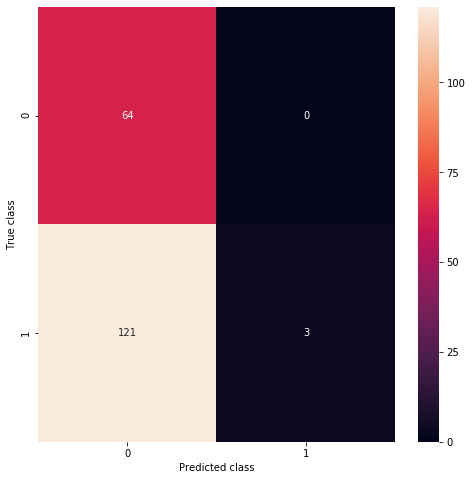

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [12]:
print('Accuracy\t|', accuracy_score(y_test, y_pred))

Accuracy	| 0.35638297872340424
